**Solve problems below, and download .ipynb file with “File>Download .ipynb” menu.**



*   The name of the ipynb file should be: Programming03_a_StudentID_Name.ipynb<br/>
ex) Programming03_a_20225432_YeongjinKo.ipynb
*   Submission Deadline : 2024/06/06 11:59pm (23:59) 



BlackBoard submission should be completed before the deadline. <br/>
If it's late less than 24 hours, you will get 50% of your score. If it's late more than 1 day, you will get 0% of your score.

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Problem 1. Multiple Linear Regression

In this problem, you will import the **white.csv** data which contains variables related to white wine such as quality of wine, acidity of wine, etc.

The goal is to perform linear regression with the quality of wine as $Y$ and all the other variables as $X$.

In [2]:
## Do not modify !!

import numpy as np
import pandas as pd

whitedata = pd.read_csv("white.csv")   # dataframe
whitedata.head()

whitedata = whitedata.dropna(axis=0)

X = np.array(whitedata.drop(["quality"],axis=1)) 
y = np.array(whitedata["quality"])

Xnew=np.hstack([np.ones(len(X)).reshape(len(X),1),X]) # adding a vector filled with 1 to the X matrix

In [3]:
Xnew.shape, y.shape

((4898, 12), (4898,))

## Problem 1-1. 
To obtain the least squares estimate of the regression coefficient $\beta$ using QR decomposition, implement **QRdecompose** function which takes Xnew and Y as intputs and returns $R_1$ and $(Q^TY)_1$ matrices as outputs.

![img](https://user-images.githubusercontent.com/3272331/203604349-4358c427-d216-4560-94b6-a5a8b1591388.PNG)


In [4]:
def QRdecompose(Xnew, y):
    # Write code here
    n, m = Xnew.shape[0], Xnew.shape[1]
    Q = np.eye(n)
    I = np.eye(n)
    R = Xnew.copy()
    for k in range(m):
        u = R[:, k]
        u_k = u[k:]
        v = np.zeros_like(u)
        v[:k] = u[:k]
        v[k] = -np.sign(u[k]) * np.sqrt(u_k.dot(u_k))
        u_v = u - v
        w = (u - v) / np.sqrt(u_v.dot(u_v))
        H = I - 2 * np.outer(w, w)
        Q = Q @ H
        R = H @ R
    
    return R[:m, :m], Q.T @ y


In [5]:
# Do not Modify!

A = np.array([[2, -2, 18], [2,1,0], [1,2,0]])
u = [3,4,5]
R1, QTY_1 = QRdecompose(A, u)
QTY_1

array([-6.33333333, -2.66666667, -1.66666667])

In [6]:
# Do Not Modify!
R_1,QTY_1=QRdecompose(Xnew,y)
print(np.round(R_1,2))

[[-6.99900e+01 -4.79740e+02 -1.94700e+01 -2.33900e+01 -4.47310e+02
  -3.20000e+00 -2.47106e+03 -9.68327e+03 -6.95700e+01 -2.23130e+02
  -3.42800e+01 -7.35850e+02]
 [ 0.00000e+00  5.90500e+01 -1.60000e-01  2.45000e+00  3.16000e+01
   4.00000e-02 -5.87900e+01  2.70840e+02  6.00000e-02 -4.50000e+00
  -1.40000e-01 -1.04100e+01]
 [-0.00000e+00  0.00000e+00 -7.05000e+00  1.21000e+00 -2.35400e+01
  -1.10000e-01  1.16820e+02 -2.71670e+02 -1.00000e-02  4.40000e-01
   2.90000e-01 -5.60000e+00]
 [ 0.00000e+00  0.00000e+00 -0.00000e+00  8.02000e+00  2.92300e+01
   1.90000e-01  1.18610e+02  3.38870e+02  2.00000e-02 -5.20000e-01
   5.20000e-01 -2.86000e+00]
 [ 0.00000e+00  0.00000e+00 -0.00000e+00  0.00000e+00 -3.51530e+02
  -1.10000e-01 -3.62660e+02 -1.13472e+03 -1.70000e-01  1.59000e+00
   2.30000e-01  3.83800e+01]
 [-0.00000e+00  0.00000e+00 -0.00000e+00  0.00000e+00 -0.00000e+00
  -1.51000e+00 -9.05200e+01 -4.47630e+02 -4.00000e-02  6.50000e-01
  -1.10000e-01  2.84200e+01]
 [ 0.00000e+00 -0.0000

## Problem 1-2.

Use the $R_1$ and $(Q^TY)_1$ matrices to get the least-squares estimate $\hat{\beta}$ 

In [7]:
# Write code here

beta = np.zeros(R_1.shape[1])
for i in range(R_1.shape[1]-1, -1, -1):
    beta[i] = (QTY_1[i] - R_1[i, i+1:] @ beta[i+1:]) / R_1[i, i]

print(beta)

[ 1.50192842e+02  6.55199613e-02 -1.86317709e+00  2.20902007e-02
  8.14828026e-02 -2.47276537e-01  3.73276519e-03 -2.85747419e-04
 -1.50284181e+02  6.86343742e-01  6.31476473e-01  1.93475697e-01]


In [8]:
# Do not modify!
# Compare with results of scikit-learn package.
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(Xnew, y)
print(lr.intercept_,lr.coef_[1:])

150.19284247458052 [ 6.55199613e-02 -1.86317709e+00  2.20902007e-02  8.14828026e-02
 -2.47276537e-01  3.73276519e-03 -2.85747419e-04 -1.50284181e+02
  6.86343742e-01  6.31476473e-01  1.93475697e-01]


## Problem 1-3.

Implement **variance_of_beta** function that calculates $Var[\hat{\beta}]$.Do not use $\texttt{numpy.linalg.inv}$, $\texttt{scipy.linalg.inv}$ or any other built-in function computing inverses.

* Input : $X_{new}, \sigma^2$
* Output : $Var[\hat\beta]$
<br/><br/>
* Hint : $Var[\hat\beta] = \sigma^2[(X^TX)]^{-1}$, Since we don't know $\sigma^2$, we assume that $\sigma^2 = \hat{\sigma^2}$



In [9]:
# Write code here

y_hat = Xnew @ beta
sigma_square = np.inner(y - y_hat, y - y_hat) / (Xnew.shape[0] - Xnew.shape[1])

In [10]:
def back_substitution(U,v):
    # Write code here!
    n = len(v)
    x = np.zeros(n)
    x[-1] = v[-1] / U[-1, -1]
    for i in range(n - 2, -1, -1):
        x[i] = (v[i] - np.dot(U[i, :], x)) / U[i, i]
    return x

def variance_of_beta(Xnew, sigma_square):
    # Write code here
    R, _ = QRdecompose(Xnew, np.eye(Xnew.shape[0]))
    I = np.eye(R.shape[0])
    # Backward substitution to find R^(-1)
    R_inv = np.zeros_like(R)
    for i in range(R.shape[1]-1, -1, -1):
        R_inv[:, i] = back_substitution(R, I[:, i])
    # (R^(-1))^T = (R^T)^(-1)
    R_inv_T = R_inv.T
    variance = sigma_square * R_inv @ R_inv_T
    return variance

In [11]:
## Do not modify

var_beta = variance_of_beta(Xnew, sigma_square)
for i, feature in enumerate(whitedata.columns[:11]):
    print(f'Variance of beta_{feature} is {var_beta[i+1,i+1]}')

Variance of beta_fixed_acidity is 0.0004357095824602358
Variance of beta_volatile_acidity is 0.01294891663897613
Variance of beta_citric_acid is 0.00917182206104665
Variance of beta_residual_sugar is 5.666054143777277e-05
Variance of beta_chlorides is 0.29870843305075595
Variance of beta_free_sulfur_dioxide is 7.125878764608148e-07
Variance of beta_total_sulfur_dioxide is 1.429300136777626e-07
Variance of beta_density is 363.83685631083864
Variance of beta_pH is 0.01110475501695312
Variance of beta_sulphates is 0.01007727158846239
Variance of beta_alcohol is 0.0005866742215622651


## Problem 1-4 (Testing)

Suppose we test <br/>

$H_0 : \beta_i = 0$   vs   $H_1 : \beta_i \neq 0 $

This test measures the contribution of a variable while the remaining variables are included in the model.
<br/>

Implement **significance_of_variable** functions that indicates whether each variable is significant or not for linear regression model.

In this problem, You need to use results of Problem 1-2, 1-3.

* Input : beta_i($\hat\beta_i$), var_beta_i($Var[\hat\beta_i]$), significance_level($\alpha$)
* Output : True or False (significant or not)

$ $

* Hint: assume that $\sigma^2 = \hat{\sigma^2}$.( Use Z-test)

In [12]:
import scipy.stats as stats

In [13]:
def significance_of_variable(beta_i, var_beta_i, significance_level):
    # Write code here
    z = beta_i / np.sqrt(var_beta_i)
    p = 2 * (1 - stats.norm.cdf(np.abs(z)))
    return p < significance_level


In [14]:
## Do not modify!!
for i, feature in enumerate(whitedata.columns[:11]):
    beta_i = beta[i+1]
    var_beta_i = var_beta[i+1, i+1]
    alpha = 0.05
    result = significance_of_variable(beta_i, var_beta_i, alpha)
    print(f'Is {feature} is significant? {result}.')

Is fixed_acidity is significant? True.
Is volatile_acidity is significant? True.
Is citric_acid is significant? False.
Is residual_sugar is significant? True.
Is chlorides is significant? False.
Is free_sulfur_dioxide is significant? True.
Is total_sulfur_dioxide is significant? False.
Is density is significant? True.
Is pH is significant? True.
Is sulphates is significant? True.
Is alcohol is significant? True.


# Problem 2. Eigenvalue Decomposition

## Problem 2-1. 
Implement **root_quad_eq** function that solves the quadratic polynomial and return the roots of quadratic polynomial equation. (Consider only quadratic polynomials that have real-valued roots.)

**In this problem, Do not use $\texttt{numpy}$, $\texttt{sympy}$ package.**

* Input : coefficients list of quadratic equation. [a, b, c]
* Output : roots of quadratic polynomial equation.

* Hint: 
roots of $ax^2+bx+c=0$ is $x = \dfrac{-b\pm\sqrt{b^2-4ac}}{2a}$

In [15]:
def root_quad_eq(coef):
    # Write code here
    a, b, c = coef
    delta = b**2 - 4*a*c
    x1 = (-b + np.sqrt(delta)) / (2*a)
    x2 = (-b - np.sqrt(delta)) / (2*a)
    return x1, x2


In [16]:
## Do not modify!!

## equation 1 : x**2 - 7*x + 10 = 0
coef1 = [1, -7, 10]
print(f'The roots of x**2 - 7*x + 10 = 0 are {root_quad_eq(coef1)}.')

## equation 2 : 2*x**2 - 5*x + 3 = 0
coef2 = [2, -5, 3]
print(f'The roots of 2*x**2 - 5*x + 3 = 0 are {root_quad_eq(coef2)}.')

The roots of x**2 - 7*x + 10 = 0 are (5.0, 2.0).
The roots of 2*x**2 - 5*x + 3 = 0 are (1.5, 1.0).


## Problem 2-2.

Implement **eig_decompose** function that calculate eigenvalue and eigenvectors of 2$\times$2 matrix $\mathbf{A}$.

**In this Problem, Do not use $\texttt{numpy.linalg}$, $\texttt{scipy.linalg}$ packages.**

In this Problem, We assume that matrix $\mathbf{A}$ has 2 different eigenvalues, both real numbers. 

* Input : square matrix $\mathbf{A}\in\mathbb{R}^{2\times2}$
* Ouput : tuple of eigenvalues of $\mathbf{A}$, matrix $\mathbf{V}\in\mathbb{R}^{2\times2}$ that has eigenvectors of $\mathbf{A}$ as column vectors. 


* How to Implement
1. make the characteristic polynomial equation.  $det(\mathbf{A} - \lambda\mathbf{I}) = 0$
2. solve the characteristic polynomial equation by using **root_quad_eq** function in Problem 2-1. Its solutions are eigenvalues of matrix $\mathbf{A}$
3. solve the homogeneous linear system. $(\mathbf{A} - \lambda\mathbf{I})\mathbf{x} = \mathbf{0}$, where $\mathbf{x} = \begin{bmatrix}
x_1 \\
x_2
\end{bmatrix}$ Hint : You can get ratio between $x_1, x_2$.
4. Sort the vectors in descending order of their eigenvalues.
5. Normalize all eigenvectors(so that the norm of eigenvector is 1) and make matrix $\mathbf{V}$ 

In [17]:
import numpy as np

In [18]:
def eig_decompose(A):
    # Write code here
    V = np.zeros((2,2))
    coef = [1, -(A[0,0] + A[1,1]), A[0,0]*A[1,1] - A[0,1]*A[1,0]]
    eigenvalues = root_quad_eq(coef)
    V[:,0] = [A[0, 1], eigenvalues[0] - A[0, 0]]
    V[:,1] = [-A[0, 1], A[0, 0] - eigenvalues[1]]
    V = V / np.linalg.norm(V, axis=0)

    return eigenvalues, V

In [19]:
# Do not modify!!

A = np.array([[2,3], [2,1]])
eig_decompose(A)

((4.0, -1.0),
 array([[ 0.83205029, -0.70710678],
        [ 0.5547002 ,  0.70710678]]))

In [20]:
# Do not modify!!

B = np.array([[2, 1], [1, 2]])
eig_decompose(B)

((3.0, 1.0),
 array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]))

# Problem 3

Principal Component Analysis(PCA)


In [21]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## Do not modify !!

whitedata = pd.read_csv("white.csv")   # dataframe
whitedata.head()

whitedata = whitedata.dropna(axis=0)

X = np.array(whitedata.drop(["quality"],axis=1)) 
y = np.array(whitedata["quality"])

## Problem 3-1

Conduct PCA of the wine data using the following steps.

1. Compute the sample covariance matrix of $X$.

In [22]:
# Write code here

n = X.shape[0]
I = np.eye(n)
ones = np.ones(n)
Scov= 1 / (n - 1) * X.T @ (I - 1 / n * np.outer(ones, ones)) @ X


print('Sample covariance matrix of X:', Scov)

Sample covariance matrix of X: [[ 7.12113586e-01 -1.93057060e-03  2.95325116e-02  3.81021814e-01
   4.25625536e-04 -7.08918642e-01  3.26601339e+00  6.69677256e-04
  -5.42648260e-02 -1.65099229e-03 -1.25532822e-01]
 [-1.93057060e-03  1.01595410e-02 -1.82327755e-03  3.28653337e-02
   1.55277486e-04 -1.66300459e-01  3.82353903e-01  8.17393269e-06
  -4.85753094e-04 -4.10990231e-04  8.39972309e-03]
 [ 2.95325116e-02 -1.82327755e-03  1.46457930e-02  5.78289265e-02
   3.02383813e-04  1.93629777e-01  6.22988708e-01  5.41137964e-05
  -2.99234513e-03  8.60882914e-04 -1.12782389e-02]
 [ 3.81021814e-01  3.28653337e-02  5.78289265e-02  2.57257702e+01
   9.82750206e-03  2.58005779e+01  8.65313030e+01  1.27271653e-02
  -1.48683661e-01 -1.54347435e-02 -2.81274033e+00]
 [ 4.25625536e-04  1.55277486e-04  3.02383813e-04  9.82750206e-03
   4.77333710e-04  3.76744976e-02  1.84687489e-01  1.68075352e-05
  -2.98364855e-04  4.17968689e-05 -9.68423502e-03]
 [-7.08918642e-01 -1.66300459e-01  1.93629777e-01  2.5

2. Standardize each column of $X$ by subtracting the sample mean and dividing by the sample standard deviation. Set the resulting matrix as **X_s**

In [23]:
# Write code here

sample_mean = np.mean(X, axis=0)
X_c = X - sample_mean[np.newaxis, :]
X_std = np.diag(Scov) ** 0.5
X_s= X_c / X_std

print(X_s)

[[ 1.72079392e-01 -8.17615531e-02  2.13258429e-01 ... -1.24679399e+00
  -3.49148610e-01 -1.39301024e+00]
 [-6.57434005e-01  2.15873592e-01  4.79962210e-02 ...  7.39953092e-01
   1.34170957e-03 -8.24191529e-01]
 [ 1.47560044e+00  1.74501618e-02  5.43782844e-01 ...  4.75053481e-01
  -4.36771190e-01 -3.36632638e-01]
 ...
 [-4.20430177e-01 -3.79396698e-01 -1.19147034e+00 ... -1.31301889e+00
  -2.61526030e-01 -9.05451345e-01]
 [-1.60544932e+00  1.16661877e-01 -2.82528194e-01 ...  1.00485270e+00
  -9.62506669e-01  1.85738237e+00]
 [-1.01293975e+00 -6.77031842e-01  3.78520636e-01 ...  4.75053481e-01
  -1.48824215e+00  1.04478422e+00]]


3. Compute the Sample covariance matrix of **X_s**

In [24]:
# Write code here

I = np.eye(n)
ones = np.ones(n)
SCov_s=1 / (n - 1) * X_s.T @ (I - 1 / n * np.outer(ones, ones)) @ X_s


print(SCov_s)

[[ 1.00000000e+00 -2.26972901e-02  2.89180698e-01  8.90207014e-02
   2.30856437e-02 -4.93958591e-02  9.10697562e-02  2.65331014e-01
  -4.25858291e-01 -1.71429850e-02 -1.20881123e-01]
 [-2.26972901e-02  1.00000000e+00 -1.49471811e-01  6.42860601e-02
   7.05115715e-02 -9.70119393e-02  8.92605036e-02  2.71138455e-02
  -3.19153683e-02 -3.57281469e-02  6.77179428e-02]
 [ 2.89180698e-01 -1.49471811e-01  1.00000000e+00  9.42116243e-02
   1.14364448e-01  9.40772210e-02  1.21130798e-01  1.49502571e-01
  -1.63748211e-01  6.23309403e-02 -7.57287301e-02]
 [ 8.90207014e-02  6.42860601e-02  9.42116243e-02  1.00000000e+00
   8.86845359e-02  2.99098354e-01  4.01439311e-01  8.38966455e-01
  -1.94133454e-01 -2.66643659e-02 -4.50631222e-01]
 [ 2.30856437e-02  7.05115715e-02  1.14364448e-01  8.86845359e-02
   1.00000000e+00  1.01392352e-01  1.98910300e-01  2.57211320e-01
  -9.04394560e-02  1.67628837e-02 -3.60188712e-01]
 [-4.93958591e-02 -9.70119393e-02  9.40772210e-02  2.99098354e-01
   1.01392352e-01  

4. Compute the first two Principal Components of **X_s**. You can use the $\texttt{numpy.linalg.eig}$ function. Do not use $\texttt{sklearn.decomposition.PCA}$ or any other built-in function that conducts PCA.

In [25]:
# Write code here


eigenvalues, eigenvectors = np.linalg.eig(SCov_s)
idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]


PC_1= X_s @ eigenvectors[:, 0]     #numpy array
PC_2= X_s @ eigenvectors[:, 1]     #numpy array


print(np.array([PC_1, PC_2]).T)

[[ 3.67656813  0.54517763]
 [-0.64452203 -0.43072597]
 [ 0.1552747   1.18967847]
 ...
 [-0.77965094  0.40843842]
 [-3.40695367 -0.91565041]
 [-2.82292329  0.13092527]]


Compare the results with the built-in function $\texttt{sklearn.decomposition.PCA}$.

Note: Signs can be opposite with the PCs that you derived.

In [35]:
#Do not modify !! 

from sklearn.decomposition import PCA 


pca = PCA(n_components=2)
PCs = pca.fit_transform(X_s)

In [36]:
PCs 

array([[ 3.67656813,  0.54517763],
       [-0.64452203, -0.43072597],
       [ 0.1552747 ,  1.18967847],
       ...,
       [-0.77965094,  0.40843842],
       [-3.40695367, -0.91565041],
       [-2.82292329,  0.13092527]])

## Problem 3-2


Draw a scatter plot of the 2 principal components. Color each point according to the "quality" of wine using the color dictionary defined below. The keys of the dictionary indicate the quality of wine and the values indicate the color.

In [28]:
# predefined dictionary for coloring your scatter plot
# DO NOT MODIFY!!

color = {
    0:"red",
    1:"green",
    2:"blue",
    3:"yellow",
    4:"brown",
    5:"orange",
    6:"dodgerblue",
    7:"grey",
    8:"black",
    9:"purple",
    10:"pink"
}

Text(0, 0.5, 'PC2')

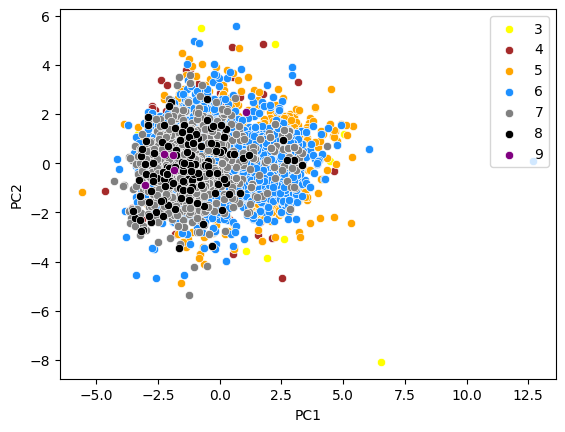

In [29]:
# Plot 2 dimensional scatter plot using different colors for each quailty label 
# write code here

for i in range(11):
    if len(PCs[y == i, 0]) == 0 or len(PCs[y == i, 0]) == 0:
        continue
    sns.scatterplot(x=PCs[y == i, 0], y=PCs[y == i, 1], color=color[i], label=f'{i}')
plt.legend(loc='upper right')
plt.xlabel('PC1')
plt.ylabel('PC2')
# plt.title('Scatter plot of first two principal components')
# plt.show()


## Problem 3-3

Compute how much percent of the total variance the two Principal components account for.

In [30]:
# Write code here



rate=(eigenvalues[0] + eigenvalues[1]) / np.sum(eigenvalues)


print(f"The two principal components explain {rate*100}% of the total variance" )


# Output of this code is not provided. 

The two principal components explain 43.61358019737441% of the total variance
